In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import copy
import time
from torchtext import data
from torchtext.vocab import Vectors
from __future__ import print_function
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import pandas as pd
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras import regularizers
import keras
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import GRU
import keras
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from keras import backend as K
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from keras.callbacks import ModelCheckpoint
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
from keras.layers import *
from keras.models import *
from keras import backend as K
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend, losses
import functools
import time
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report
import joblib
from tensorflow.keras.models import load_model

D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pickle
import numpy as np
def load_tsv_format_data(filename, skip_head=True):
    sequences = []
    labels = []

    with open(filename, 'r') as file:
        if skip_head:
            next(file)
        for line in file:
            if line[-1] == '\n':
                line = line[:-1]
            list = line.split('\t')
            sequences.append(list[2])
            labels.append(int(list[1]))

    return sequences, labels

# Load data

In [3]:
####### 4mC

# 4mC_S.cerevisiae
# path_train_data = './data/DNA_MS/tsv/4mC/4mC_S.cerevisiae/train.tsv'
# path_test_data = './data/DNA_MS/tsv/4mC/4mC_S.cerevisiae/test.tsv'

# 4mC_F.vesca
# path_train_data = './data/DNA_MS/tsv/4mC/4mC_F.vesca/train.tsv'
# path_test_data = './data/DNA_MS/tsv/4mC/4mC_F.vesca/test.tsv'

# # 4mC_C.equisetifolia
path_train_data = './data/DNA_MS/tsv/4mC/4mC_C.equisetifolia/train.tsv'
path_test_data = './data/DNA_MS/tsv/4mC/4mC_C.equisetifolia/test.tsv'

# # 4mC_Tolypocladium
# path_train_data = './data/DNA_MS/tsv/4mC/4mC_Tolypocladium/train.tsv'
# path_test_data = './data/DNA_MS/tsv/4mC/4mC_Tolypocladium/test.tsv'

####### 5hmC

# 5hmC_H.sapiens
# path_train_data = './data/DNA_MS/tsv/5hmC/5hmC_H.sapiens/train.tsv'
# path_test_data = './data/DNA_MS/tsv/5hmC/5hmC_H.sapiens/test.tsv'

# # 5hmC_M.musculus
# path_train_data = './data/DNA_MS/tsv/5hmC/5hmC_M.musculus/train.tsv'
# path_test_data = './data/DNA_MS/tsv/5hmC/5hmC_M.musculus/test.tsv'

####### 6mA

# # 6mA_A.thaliana
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_A.thaliana/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_A.thaliana/test.tsv'

# # 6mA_C.elegans
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_C.elegans/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_C.elegans/test.tsv'

# # 6mA_C.equisetifolia
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_C.equisetifolia/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_C.equisetifolia/test.tsv'

# # 6mA_D.melanogaster
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_D.melanogaster/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_D.melanogaster/test.tsv'

# # 6mA_H.sapiens
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_H.sapiens/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_H.sapiens/test.tsv'

# # 6mA_F.vesca
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_F.vesca/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_F.vesca/test.tsv'

# # 6mA_R.chinensis
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_R.chinensis/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_R.chinensis/test.tsv'

# # 6mA_S.cerevisiae
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_S.cerevisiae/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_S.cerevisiae/test.tsv'

# # 6mA_T.thermophile
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_T.thermophile/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_T.thermophile/test.tsv'

# # 6mA_Tolypocladium
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_Tolypocladium/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_Tolypocladium/test.tsv'

# # 6mA_Xoc BLS256
# path_train_data = './data/DNA_MS/tsv/6mA/6mA_Xoc BLS256/train.tsv'
# path_test_data = './data/DNA_MS/tsv/6mA/6mA_Xoc BLS256/test.tsv'

sequences_train, Label_train = load_tsv_format_data(path_train_data)
sequences_test,Label_test = load_tsv_format_data(path_test_data)



In [4]:
# parameters of data augmentation & padding & kmer_times
padding_len = 50                            # pad the original length to how long 
mask_rate = 1/4                             # choose the rate to randomly mask the original sequence
insert_num = 5                              # insert such nums of bases into original sequence
exchange_num = 5                            # exchange such nums of bases
kmer_times = 2                              # choose kmer times
kmer_length = sum(range(kmer_times+1))
shape_length = padding_len * kmer_length

# Data augmentation

In [5]:
# Random interpolation
from random import randint, choice
import random
dna = ['A','G','C','T']
def random_insert(data,num):
    data = list(data)
    while num > 0:
        insert_site = randint(0,len(data)-1) + 1
        insert_dna_index = randint(0,len(dna)-1)
        data.append('0')
        data[insert_site+1:] = data[insert_site:-1]
        data[insert_site] = dna[insert_dna_index]
        num -= 1
    return ''.join(data)

sequences_insert = []
for i in range(len(sequences_train)):
    sequences_insert.append(random_insert(sequences_train[i],insert_num))
    Label_train.append(Label_train[i])
    
sequences_train_insert = sequences_train + sequences_insert

In [6]:
# Random exchange
from random import randint, choice
import random

def exchange(data,num):
    data = list(data)
    exchange_num = num*2
    while exchange_num > 0:
        exchange_site1 = randint(0, len(data)-1)
        exchange_site2 = randint(0,len(data)-1)
        data[exchange_site1],data[exchange_site2] = data[exchange_site2],data[exchange_site1]
        exchange_num -= 2
    return ''.join(data)

sequences_exchange = []
for i in range(len(sequences_train)):
    sequences_exchange.append(exchange(sequences_train[i],exchange_num))
    # Label_train.append(Label_train[i])
    
sequences_train_exchange = sequences_train + sequences_exchange

In [7]:
# Random masking
from random import randint, choice

def mask_DNA(data1,rate):
    num = int(len(data1)*rate)
    dna_list = list(data1)
    while num > 0:
        mutation_site = randint(0, len(dna_list)-1)
        dna_list[mutation_site] = choice(list('M'))
        num -=1
    return ''.join(dna_list) 

sequences_mask = []
for i in range(len(sequences_train)):
    sequences_mask.append(mask_DNA(sequences_train[i],mask_rate))
    # Label_train.append(Label_train[i])
sequences_train_mask = sequences_train + sequences_mask

In [8]:
# padding task
Label_train_orig = Label_train[0:len(Label_train)//2]
for i in range(len(Label_train_orig)):
    n_pad = padding_len - len(sequences_train[i])
    sequences_train[i] += ('0' * n_pad)

for i in range(len(Label_train)):
    n_pad = padding_len - len(sequences_train_insert[i])
    sequences_train_insert[i] += ('0' * n_pad)

    n_pad = padding_len - len(sequences_train_exchange[i])
    sequences_train_exchange[i] += ('0' * n_pad)

    n_pad = padding_len - len(sequences_train_mask[i])
    sequences_train_mask[i] += ('0' * n_pad)

for i in range(len(Label_test)):
    n_pad = padding_len - len(sequences_test[i])
    sequences_test[i] += ('0' * n_pad)


# kmer split

In [9]:
def split_kmer(sequences, k_mer):
    print('=' * 50, '1 to {}-mer Split'.format(k_mer), '=' * 50)
    '''
    sequences=['MKTLLLTL', 'VVVTIVC']
    1-mer:[
            [
             ['M', 'K', 'T', 'L', 'L', 'L', 'T', 'L']
            ], 
            [
             ['V', 'V', 'V', 'T', 'I', 'V', 'C']
            ]
          ]
    2-mer:[
            [
             ['-M', 'KT', 'LL', 'LT', 'L-'], 
             ['MK', 'TL', 'LL', 'TL']
            ], 
            [
             ['-V', 'VV', 'TI', 'VC'], 
             ['VV', 'VT', 'IV', 'C-']
            ]
          ]
    3-mer:[
            [
             ['--M', 'KTL', 'LLT', 'L--'], 
             ['-MK', 'TLL', 'LTL'],
             ['MKT', 'LLL', 'TL-']
            ], 
            [
             ['--V', 'VVT', 'IVC'], 
             ['-VV', 'VTI', 'VC-'],
             ['VVV', 'TIV', 'V--']
            ]
          ]
    '''
    sequences_kmer = []

    for seq in sequences:
        kmer_list = [[] for i in range(k_mer)]
        seq_kmer = [[] for i in range(len(seq))]

        # Traverse every token of every sequence
        for i in range(len(seq)):
            # Each token is divided into k-mer from 1 to k
            for k in range(1, k_mer + 1):
                # Each token position is represented by k kinds of kmer
                for j in range(k):
                    # There is no need to add '-' before the beginning of the sequence
                    if i - j >= 0:
                        kmer = seq[i - j:i - j + k]

                        # Need to add '-' after the end of the sequence
                        if i - j + k > len(seq):
                            num_pad = i - j + k - len(seq)
                            kmer += '-' * num_pad

                    # Need to add '-' before the beginning of the sequence
                    else:
                        num_pad = j - i
                        kmer = ('-' * num_pad) + seq[0:  k - num_pad]

                        # Need to add '-' after the end of the sequence
                        if k - num_pad > len(seq):
                            num_pad = k - num_pad - len(seq)
                            kmer += '-' * num_pad

                    kmer_list[k - 1].append(kmer)
                    seq_kmer[i].append(kmer)
        sequences_kmer.append(seq_kmer)

        if len(sequences_kmer) % 1000 == 0:
            print('Processing: {}/{}'.format(len(sequences_kmer), len(sequences)))

    print('=' * 50, '{}-mer Split Over'.format(k_mer), '=' * 50)
    return sequences_kmer

In [10]:
sequences_train_kmer = split_kmer(sequences_train,kmer_times)
sequences_train_kmer_insert = split_kmer(sequences_train_insert,kmer_times)
sequences_train_kmer_exchange = split_kmer(sequences_train_exchange,kmer_times)
sequences_train_kmer_mask = split_kmer(sequences_train_mask,kmer_times)
sequences_test_kmer = split_kmer(sequences_test,kmer_times)

================================================== 1 to 2-mer Split ==================================================
================================================== 2-mer Split Over ==================================================
================================================== 1 to 2-mer Split ==================================================
================================================== 2-mer Split Over ==================================================
================================================== 1 to 2-mer Split ==================================================
================================================== 2-mer Split Over ==================================================
================================================== 1 to 2-mer Split ==================================================
================================================== 2-mer Split Over ==================================================
================================================

In [11]:
# Resize the sequences shape

sequences = list(np.reshape(np.array(sequences_train_kmer,dtype =object),(-1))) + list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1)))
sequences_insert = list(np.reshape(np.array(sequences_train_kmer_insert,dtype =object),(-1))) + list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1)))
sequences_exchange = list(np.reshape(np.array(sequences_train_kmer_exchange,dtype =object),(-1))) + list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1)))
sequences_mask = list(np.reshape(np.array(sequences_train_kmer_mask,dtype =object),(-1))) + list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1)))

# Encoding

In [12]:
# set the word_list and vocab_size

word_list = " ".join(sequences).split()
word_list1 = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list1)}
vocab_size = len(word_dict)+1

word_list_insert = " ".join(sequences_insert).split()
word_list1_insert = list(set(word_list_insert))
word_dict_insert = {w: i for i, w in enumerate(word_list1_insert)}
vocab_size_insert = len(word_dict_insert)+1

word_list_exchange = " ".join(sequences_exchange).split()
word_list1_exchange = list(set(word_list_exchange))
word_dict_exchange = {w: i for i, w in enumerate(word_list1_exchange)}
vocab_size_exchange = len(word_dict_exchange)+1

word_list_mask = " ".join(sequences_mask).split()
word_list1_mask = list(set(word_list_mask))
word_dict_mask = {w: i for i, w in enumerate(word_list1_mask)}
vocab_size_mask = len(word_dict_mask)+1

In [13]:
# Encoding task
X_train = []
X_test = []
x_train = list(np.reshape(np.array(sequences_train_kmer,dtype = object),(-1,shape_length)))
x_test = list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1,shape_length)))
for seq in x_train:
    X_train.append(([word_dict[n] for n in seq]))
for seq in x_test:
    X_test.append(([word_dict[n] for n in seq]))

X_train_insert = []
X_test_insert = []
x_train_insert = list(np.reshape(np.array(sequences_train_kmer_insert,dtype = object),(-1,shape_length)))
x_test = list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1,shape_length)))
for seq in x_train_insert:
    X_train_insert.append(([word_dict_insert[n] for n in seq]))
for seq in x_test:
    X_test_insert.append(([word_dict_insert[n] for n in seq]))

X_train_exchange = []
X_test_exchange = []
x_train_exchange = list(np.reshape(np.array(sequences_train_kmer_exchange,dtype = object),(-1,shape_length)))
x_test = list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1,shape_length)))
for seq in x_train_exchange:
    X_train_exchange.append(([word_dict_exchange[n] for n in seq]))
for seq in x_test:
    X_test_exchange.append(([word_dict_exchange[n] for n in seq]))

X_train_mask = []
X_test_mask = []
x_train_mask = list(np.reshape(np.array(sequences_train_kmer_mask,dtype = object),(-1,shape_length)))
x_test = list(np.reshape(np.array(sequences_test_kmer,dtype = object),(-1,shape_length)))
for seq in x_train_mask:
    X_train_mask.append(([word_dict_mask[n] for n in seq]))
for seq in x_test:
    X_test_mask.append(([word_dict_mask[n] for n in seq]))

In [14]:
# np.array of sequences
X_train = np.array(X_train)
X_train_insert = np.array(X_train_insert)
X_train_exchange = np.array(X_train_exchange)
X_train_mask = np.array(X_train_mask)

X_test = np.array(X_test)
X_test_insert = np.array(X_test_insert)
X_test_exchange = np.array(X_test_exchange)
X_test_mask = np.array(X_test_mask)

In [15]:
# Categorical format of labels
from tensorflow.keras.utils import to_categorical
Label_train_orig = to_categorical(Label_train_orig)
Label_train = to_categorical(Label_train)
Label_test = to_categorical(Label_test)

In [16]:
y_train_orig = np.array(Label_train_orig)
y_train = np.array(Label_train)
y_test = np.array(Label_test)

In [17]:
# set embedding dim and embedding matrix

embedding_dim = 100
embedding_matrix = np.zeros((len(word_list1) + 1, embedding_dim))
embedding_matrix_insert = np.zeros((len(word_list1_insert) + 1, embedding_dim))
embedding_matrix_exchange = np.zeros((len(word_list1_exchange) + 1, embedding_dim))
embedding_matrix_mask = np.zeros((len(word_list1_mask) + 1, embedding_dim))

# Attention layer

In [18]:
class attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

        # e = K.tanh(K.dot(x,self.W)+self.b)
        # # Remove dimension of size 1
        # e = K.squeeze(e, axis=-1)   
        # # Compute the weights
        # alpha = K.softmax(e)
        # # Reshape to tensorFlow format
        # alpha = K.expand_dims(alpha, axis=-1)
        # # Compute the context vector
        # context = x * alpha
        # context = K.sum(context, axis=1)
        # return context

# PGD adversarial training

In [19]:
def pgd(model, optimizer, loss_func, alpha, esp, k):
    """
    :param model: the defined model
    :param optimizer: adam
    :param loss_func: binary_cross_entropy
    :param alpha: perturbation learning rate
    :param esp: perturbation radius
    :param k: iterate times
    :return: train_step
    """
    @tf.function
    def train_step(self, data):
        x,y = data
        for i in range(k):
            with tf.GradientTape() as tape:
                y_predict = model(x, training=True)
                loss = loss_func(y, y_predict)
            embedding = model.trainable_variables[0]
            if i == 0:
                embedding_bak = model.trainable_variables[0]
                # r = tf.zeros_like(embedding_bak)
            gradients = tape.gradient(loss, model.trainable_variables)
            embedding_gradient = tf.zeros_like(embedding) + gradients[0]
            if i == 0:
                gradient_bak = gradients
            norm = tf.norm(embedding_gradient)
            if norm <= esp:
                model.trainable_variables[0].assign_add(alpha * embedding_gradient)
            else:
                model.trainable_variables[0].assign_add(alpha * embedding_gradient / norm)
        with tf.GradientTape() as tape1:
            y_predict1 = model(x, training=True)
            loss1 = loss_func(y, y_predict1)
        gradients = tape1.gradient(loss1, model.trainable_variables)
        model.trainable_variables[0] = embedding_bak
        optimizer.apply_gradients(zip(gradients+gradient_bak, model.trainable_variables))
        return {m.name: m.result() for m in self.metrics}
    return train_step


In [20]:
# performance evaluation

import numpy as np
import tensorflow as tf
from keras import backend as K

def mcc(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())



# Model define

In [21]:
# Due to different vocab_size and word_list, we define different models
############## pgd model
model_pgd = Sequential()
model_pgd.add(Embedding(vocab_size, embedding_dim,input_length=shape_length,trainable=False))
model_pgd.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu',padding='same'))  
model_pgd.add(MaxPooling1D((2)))
model_pgd.add(Dropout(0.5))
model_pgd.add(Conv1D(filters = 16, kernel_size = 2, activation = 'relu',padding='same'))
model_pgd.add(MaxPooling1D((2)))

model_pgd.add(Bidirectional(LSTM(128, return_sequences=True)))
model_pgd.add(attention(return_sequences=False)) 
model_pgd.add(Dense(2, activation='softmax'))

model_pgd.compile('adam', 'categorical_crossentropy', metrics=['accuracy',mcc,tf.keras.metrics.AUC()])
model_pgd.summary()

############## base model
model_out_dp = Sequential()
model_out_dp.add(Embedding(vocab_size, embedding_dim,input_length=shape_length,trainable=False))
model_out_dp.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu',padding='same'))  
model_out_dp.add(MaxPooling1D((2)))
model_out_dp.add(Dropout(0.5))
model_out_dp.add(Conv1D(filters = 16, kernel_size = 2, activation = 'relu',padding='same'))
model_out_dp.add(MaxPooling1D((2)))

model_out_dp.add(Bidirectional(LSTM(128, return_sequences=True)))
model_out_dp.add(attention(return_sequences=False)) 
model_out_dp.add(Dense(2, activation='softmax'))

model_out_dp.compile('adam', 'categorical_crossentropy', metrics=['accuracy',mcc,tf.keras.metrics.AUC()])
model_out_dp.summary()

############### data augmentation
############### insert model
model_insert = Sequential()
model_insert.add(Embedding(vocab_size_insert, embedding_dim,input_length=shape_length,trainable=False))
model_insert.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu',padding='same'))  
model_insert.add(MaxPooling1D((2)))
model_insert.add(Dropout(0.5))
model_insert.add(Conv1D(filters = 16, kernel_size = 2, activation = 'relu',padding='same'))
model_insert.add(MaxPooling1D((2)))

model_insert.add(Bidirectional(LSTM(128, return_sequences=True)))
model_insert.add(attention(return_sequences=False)) 
model_insert.add(Dense(2, activation='softmax'))

model_insert.compile('adam', 'categorical_crossentropy', metrics=['accuracy',mcc,tf.keras.metrics.AUC()])
model_insert.summary()

############# exchange model
model_exchange = Sequential()
model_exchange.add(Embedding(vocab_size_exchange, embedding_dim,input_length=shape_length,trainable=False))
model_exchange.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu',padding='same')) 
model_exchange.add(MaxPooling1D((2)))
model_exchange.add(Dropout(0.5))
model_exchange.add(Conv1D(filters = 16, kernel_size = 2, activation = 'relu',padding='same'))
model_exchange.add(MaxPooling1D((2)))

model_exchange.add(Bidirectional(LSTM(128, return_sequences=True)))
model_exchange.add(attention(return_sequences=False)) 
model_exchange.add(Dense(2, activation='softmax'))

model_exchange.compile('adam', 'categorical_crossentropy', metrics=['accuracy',mcc,tf.keras.metrics.AUC()])
model_exchange.summary()

############## mask model
model_mask = Sequential()
model_mask.add(Embedding(vocab_size_mask, embedding_dim,input_length=shape_length,trainable=False))
model_mask.add(Conv1D(filters = 128, kernel_size = 2, activation = 'relu',padding='same'))  
model_mask.add(MaxPooling1D((2)))
model_mask.add(Dropout(0.5))
model_mask.add(Conv1D(filters = 16, kernel_size = 2, activation = 'relu',padding='same'))
model_mask.add(MaxPooling1D((2)))

model_mask.add(Bidirectional(LSTM(128, return_sequences=True)))
model_mask.add(attention(return_sequences=False)) 
model_mask.add(Dense(2, activation='softmax'))

model_mask.compile('adam', 'categorical_crossentropy', metrics=['accuracy',mcc,tf.keras.metrics.AUC()])
model_mask.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          3200      
                                                                 
 conv1d (Conv1D)             (None, 150, 128)          25728     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 75, 16)            4112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 16)           0         
 1D)                                                    

 max_pooling1d_9 (MaxPooling  (None, 37, 16)           0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 37, 256)          148480    
 nal)                                                            
                                                                 
 attention_4 (attention)     (None, 256)               293       
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 183,527
Trainable params: 179,127
Non-trainable params: 4,400
_________________________________________________________________


# PGD and Non-PGD Train

In [22]:
# pgd_train
train_method = 'pgd' 
model = model_pgd 
train_step = pgd(model, Adam(), categorical_crossentropy, alpha=0.01, esp=1, k=4) 
model.train_step = functools.partial(train_step, model)

model.train_function = None
cp = ModelCheckpoint('./4mC_C.equisetifolia_pgd_model',monitor='val_accuracy',verbose=1,save_best_only=True) 

history=model.fit(X_train, y_train_orig, validation_data=(X_test, y_test),epochs=100, batch_size=64,callbacks=[cp])


Epoch 1/100
6/6 [==============================] - ETA: 0s
Epoch 1: val_accuracy improved from -inf to 0.76503, saving model to .\4mC_C.equisetifolia_pgd_model
INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 22s 2s/step - val_loss: 0.6835 - val_accuracy: 0.7650 - val_mcc: 0.5500 - val_auc: 0.8197
Epoch 2/100
6/6 [==============================] - ETA: 0s
Epoch 2: val_accuracy did not improve from 0.76503
6/6 [==============================] - 1s 247ms/step - val_loss: 0.6318 - val_accuracy: 0.7541 - val_mcc: 0.5251 - val_auc: 0.8422
Epoch 3/100
6/6 [==============================] - ETA: 0s
Epoch 3: val_accuracy did not improve from 0.76503
6/6 [==============================] - 1s 241ms/step - val_loss: 0.5142 - val_accuracy: 0.7623 - val_mcc: 0.5306 - val_auc: 0.8295
Epoch 4/100
6/6 [==============================] - ETA: 0s
Epoch 4: val_accuracy did not improve from 0.76503
6/6 [==============================] - 1s 253ms/step - val_loss: 0.4981 - val_accuracy: 0.7486 - val_mcc: 0.5168 - val_auc: 0.8373
Epoch 5/100
6/6 [==============================] - ETA: 0s
Epoch 5: val_accuracy did not improve from 0.76503
6/6 [==============================] -

INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 9s 2s/step - val_loss: 0.4795 - val_accuracy: 0.7732 - val_mcc: 0.5596 - val_auc: 0.8585
Epoch 11/100
6/6 [==============================] - ETA: 0s
Epoch 11: val_accuracy did not improve from 0.77322
6/6 [==============================] - 2s 291ms/step - val_loss: 0.4791 - val_accuracy: 0.7732 - val_mcc: 0.5636 - val_auc: 0.8584
Epoch 12/100
6/6 [==============================] - ETA: 0s
Epoch 12: val_accuracy improved from 0.77322 to 0.77596, saving model to .\4mC_C.equisetifolia_pgd_model
INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 9s 2s/step - val_loss: 0.4685 - val_accuracy: 0.7760 - val_mcc: 0.5668 - val_auc: 0.8588
Epoch 13/100
6/6 [==============================] - ETA: 0s
Epoch 13: val_accuracy did not improve from 0.77596
6/6 [==============================] - 2s 338ms/step - val_loss: 0.4716 - val_accuracy: 0.7678 - val_mcc: 0.5553 - val_auc: 0.8557
Epoch 14/100
6/6 [==============================] - ETA: 0s
Epoch 14: val_accuracy did not improve from 0.77596
6/6 [==============================] - 2s 336ms/step - val_loss: 0.4745 - val_accuracy: 0.7678 - val_mcc: 0.5491 - val_auc: 0.8600
Epoch 15/100
6/6 [==============================] - ETA: 0s
Epoch 15: val_accuracy did not improve from 0.77596
6/6 [==============================] - 2s 338ms/step - val_loss: 0.4783 - val_accuracy: 0.7596 - val_mcc: 0.5396 - val_auc: 0.8523
Epoch 16/100
6/6 [==============================] - ETA: 0s
Epoch 16: val_accuracy improved from 0.77596 to 0.80055, saving model to .\4mC_C.eq

INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 10s 2s/step - val_loss: 0.4707 - val_accuracy: 0.8005 - val_mcc: 0.6055 - val_auc: 0.8612
Epoch 17/100
6/6 [==============================] - ETA: 0s
Epoch 17: val_accuracy did not improve from 0.80055
6/6 [==============================] - 3s 432ms/step - val_loss: 0.4911 - val_accuracy: 0.7705 - val_mcc: 0.5605 - val_auc: 0.8455
Epoch 18/100
6/6 [==============================] - ETA: 0s
Epoch 18: val_accuracy did not improve from 0.80055
6/6 [==============================] - 3s 431ms/step - val_loss: 0.4804 - val_accuracy: 0.7869 - val_mcc: 0.5754 - val_auc: 0.8602
Epoch 19/100
6/6 [==============================] - ETA: 0s
Epoch 19: val_accuracy did not improve from 0.80055
6/6 [==============================] - 3s 428ms/step - val_loss: 0.4659 - val_accuracy: 0.7705 - val_mcc: 0.5584 - val_auc: 0.8643
Epoch 20/100
6/6 [==============================] - ETA: 0s
Epoch 20: val_accuracy did not improve from 0.80055
6/6 [=========================

INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 10s 2s/step - val_loss: 0.4506 - val_accuracy: 0.8087 - val_mcc: 0.6273 - val_auc: 0.8756
Epoch 27/100
6/6 [==============================] - ETA: 0s
Epoch 27: val_accuracy did not improve from 0.80874
6/6 [==============================] - 2s 406ms/step - val_loss: 0.4474 - val_accuracy: 0.8087 - val_mcc: 0.6273 - val_auc: 0.8780
Epoch 28/100
6/6 [==============================] - ETA: 0s
Epoch 28: val_accuracy did not improve from 0.80874
6/6 [==============================] - 2s 406ms/step - val_loss: 0.5123 - val_accuracy: 0.7404 - val_mcc: 0.5032 - val_auc: 0.8310
Epoch 29/100
6/6 [==============================] - ETA: 0s
Epoch 29: val_accuracy did not improve from 0.80874
6/6 [==============================] - 2s 397ms/step - val_loss: 0.4733 - val_accuracy: 0.7951 - val_mcc: 0.5951 - val_auc: 0.8670
Epoch 30/100
6/6 [==============================] - ETA: 0s
Epoch 30: val_accuracy did not improve from 0.80874
6/6 [=========================

INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 10s 2s/step - val_loss: 0.4353 - val_accuracy: 0.8142 - val_mcc: 0.6397 - val_auc: 0.8850
Epoch 40/100
6/6 [==============================] - ETA: 0s
Epoch 40: val_accuracy did not improve from 0.81421
6/6 [==============================] - 3s 476ms/step - val_loss: 0.4263 - val_accuracy: 0.8033 - val_mcc: 0.6087 - val_auc: 0.8853
Epoch 41/100
6/6 [==============================] - ETA: 0s
Epoch 41: val_accuracy did not improve from 0.81421
6/6 [==============================] - 3s 466ms/step - val_loss: 0.4252 - val_accuracy: 0.8060 - val_mcc: 0.6119 - val_auc: 0.8859
Epoch 42/100
6/6 [==============================] - ETA: 0s
Epoch 42: val_accuracy improved from 0.81421 to 0.81694, saving model to .\4mC_C.equisetifolia_pgd_model
INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 10s 2s/step - val_loss: 0.4311 - val_accuracy: 0.8169 - val_mcc: 0.6470 - val_auc: 0.8876
Epoch 43/100
6/6 [==============================] - ETA: 0s
Epoch 43: val_accuracy did not improve from 0.81694
6/6 [==============================] - 4s 655ms/step - val_loss: 0.4259 - val_accuracy: 0.8060 - val_mcc: 0.6098 - val_auc: 0.8847
Epoch 44/100
6/6 [==============================] - ETA: 0s
Epoch 44: val_accuracy did not improve from 0.81694
6/6 [==============================] - 4s 655ms/step - val_loss: 0.4389 - val_accuracy: 0.8169 - val_mcc: 0.6449 - val_auc: 0.8871
Epoch 45/100
6/6 [==============================] - ETA: 0s
Epoch 45: val_accuracy did not improve from 0.81694
6/6 [==============================] - 4s 653ms/step - val_loss: 0.4224 - val_accuracy: 0.8169 - val_mcc: 0.6347 - val_auc: 0.8883
Epoch 46/100
6/6 [==============================] - ETA: 0s
Epoch 46: val_accuracy did not improve from 0.81694
6/6 [=========================

INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 11s 2s/step - val_loss: 0.4456 - val_accuracy: 0.8224 - val_mcc: 0.6431 - val_auc: 0.8762
Epoch 65/100
6/6 [==============================] - ETA: 0s
Epoch 65: val_accuracy did not improve from 0.82240
6/6 [==============================] - 4s 652ms/step - val_loss: 0.4207 - val_accuracy: 0.8033 - val_mcc: 0.6087 - val_auc: 0.8977
Epoch 66/100
6/6 [==============================] - ETA: 0s
Epoch 66: val_accuracy did not improve from 0.82240
6/6 [==============================] - 4s 648ms/step - val_loss: 0.4301 - val_accuracy: 0.8197 - val_mcc: 0.6338 - val_auc: 0.8905
Epoch 67/100
6/6 [==============================] - ETA: 0s
Epoch 67: val_accuracy did not improve from 0.82240
6/6 [==============================] - 4s 647ms/step - val_loss: 0.4342 - val_accuracy: 0.8115 - val_mcc: 0.6223 - val_auc: 0.8857
Epoch 68/100
6/6 [==============================] - ETA: 0s
Epoch 68: val_accuracy did not improve from 0.82240
6/6 [=========================

INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 11s 2s/step - val_loss: 0.4361 - val_accuracy: 0.8251 - val_mcc: 0.6483 - val_auc: 0.8844
Epoch 82/100
6/6 [==============================] - ETA: 0s
Epoch 82: val_accuracy did not improve from 0.82514
6/6 [==============================] - 4s 722ms/step - val_loss: 0.4305 - val_accuracy: 0.8197 - val_mcc: 0.6399 - val_auc: 0.8880
Epoch 83/100
6/6 [==============================] - ETA: 0s
Epoch 83: val_accuracy did not improve from 0.82514
6/6 [==============================] - 4s 714ms/step - val_loss: 0.4634 - val_accuracy: 0.7951 - val_mcc: 0.5971 - val_auc: 0.8871
Epoch 84/100
6/6 [==============================] - ETA: 0s
Epoch 84: val_accuracy improved from 0.82514 to 0.82787, saving model to .\4mC_C.equisetifolia_pgd_model
INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


INFO:tensorflow:Assets written to: .\4mC_C.equisetifolia_pgd_model\assets


6/6 [==============================] - 12s 2s/step - val_loss: 0.4592 - val_accuracy: 0.8279 - val_mcc: 0.6535 - val_auc: 0.8786
Epoch 85/100
6/6 [==============================] - ETA: 0s
Epoch 85: val_accuracy did not improve from 0.82787
6/6 [==============================] - 4s 700ms/step - val_loss: 0.4503 - val_accuracy: 0.8087 - val_mcc: 0.6191 - val_auc: 0.8871
Epoch 86/100
6/6 [==============================] - ETA: 0s
Epoch 86: val_accuracy did not improve from 0.82787
6/6 [==============================] - 4s 696ms/step - val_loss: 0.4501 - val_accuracy: 0.8060 - val_mcc: 0.6139 - val_auc: 0.8890
Epoch 87/100
6/6 [==============================] - ETA: 0s
Epoch 87: val_accuracy did not improve from 0.82787
6/6 [==============================] - 4s 696ms/step - val_loss: 0.4522 - val_accuracy: 0.8279 - val_mcc: 0.6556 - val_auc: 0.8821
Epoch 88/100
6/6 [==============================] - ETA: 0s
Epoch 88: val_accuracy did not improve from 0.82787
6/6 [=========================

In [23]:
# base_model_train

cp = ModelCheckpoint('4mC_C.equisetifolia_normal_model',monitor='val_accuracy',verbose=1,save_best_only=True) 

history_orig=model_out_dp.fit(X_train, y_train_orig, validation_data=(X_test, y_test),epochs=100, batch_size=64,callbacks=[cp])


Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.5000 - mcc: -0.0061 - auc_1: 0.5388
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to 4mC_C.equisetifolia_normal_model
INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 12s 2s/step - loss: 0.6939 - accuracy: 0.5000 - mcc: -0.0061 - auc_1: 0.5388 - val_loss: 0.6901 - val_accuracy: 0.5000 - val_mcc: -0.0469 - val_auc_1: 0.6362
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.6639 - mcc: 0.3471 - auc_1: 0.6638
Epoch 2: val_accuracy improved from 0.50000 to 0.76776, saving model to 4mC_C.equisetifolia_normal_model
INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.6882 - accuracy: 0.6639 - mcc: 0.3471 - auc_1: 0.6638 - val_loss: 0.6797 - val_accuracy: 0.7678 - val_mcc: 0.5553 - val_auc_1: 0.8336
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.6749 - mcc: 0.3333 - auc_1: 0.7102
Epoch 3: val_accuracy did not improve from 0.76776
6/6 [==============================] - 1s 213ms/step - loss: 0.6672 - accuracy: 0.6749 - mcc: 0.3333 - auc_1: 0.7102 - val_loss: 0.6143 - val_accuracy: 0.7240 - val_mcc: 0.4250 - val_auc_1: 0.8063
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 0.5606 - accuracy: 0.7268 - mcc: 0.4567 - auc_1: 0.7949
Epoch 4: val_accuracy improved from 0.76776 to 0.77322, saving model to 4mC_C.equisetifolia_normal_model
INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.5606 - accuracy: 0.7268 - mcc: 0.4567 - auc_1: 0.7949 - val_loss: 0.4807 - val_accuracy: 0.7732 - val_mcc: 0.5514 - val_auc_1: 0.8539
Epoch 5/100
6/6 [==============================] - ETA: 0s - loss: 0.4858 - accuracy: 0.7869 - mcc: 0.5774 - auc_1: 0.8407
Epoch 5: val_accuracy did not improve from 0.77322
6/6 [==============================] - 1s 202ms/step - loss: 0.4858 - accuracy: 0.7869 - mcc: 0.5774 - auc_1: 0.8407 - val_loss: 0.4749 - val_accuracy: 0.7623 - val_mcc: 0.5448 - val_auc_1: 0.8563
Epoch 6/100
6/6 [==============================] - ETA: 0s - loss: 0.4828 - accuracy: 0.7814 - mcc: 0.5670 - auc_1: 0.8440
Epoch 6: val_accuracy did not improve from 0.77322
6/6 [==============================] - 1s 196ms/step - loss: 0.4828 - accuracy: 0.7814 - mcc: 0.5670 - auc_1: 0.8440 - val_loss: 0.4889 - val_accuracy: 0.7541 - val_mcc: 0.5292 - val_auc_1: 0.8515
Epoch 7/100
6/6 [==============================] - ETA: 0s - los

INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.4815 - accuracy: 0.7896 - mcc: 0.5725 - auc_1: 0.8616 - val_loss: 0.4590 - val_accuracy: 0.8115 - val_mcc: 0.6264 - val_auc_1: 0.8744
Epoch 9/100
6/6 [==============================] - ETA: 0s - loss: 0.4489 - accuracy: 0.7869 - mcc: 0.5673 - auc_1: 0.8684
Epoch 9: val_accuracy did not improve from 0.81148
6/6 [==============================] - 1s 199ms/step - loss: 0.4489 - accuracy: 0.7869 - mcc: 0.5673 - auc_1: 0.8684 - val_loss: 0.4588 - val_accuracy: 0.7678 - val_mcc: 0.5553 - val_auc_1: 0.8679
Epoch 10/100
6/6 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.8033 - mcc: 0.5965 - auc_1: 0.8824
Epoch 10: val_accuracy did not improve from 0.81148
6/6 [==============================] - 1s 195ms/step - loss: 0.4307 - accuracy: 0.8033 - mcc: 0.5965 - auc_1: 0.8824 - val_loss: 0.4472 - val_accuracy: 0.7869 - val_mcc: 0.5897 - val_auc_1: 0.8761
Epoch 11/100
6/6 [==============================] - ETA: 0s - 

INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.4120 - accuracy: 0.8169 - mcc: 0.6327 - auc_1: 0.8951 - val_loss: 0.4170 - val_accuracy: 0.8197 - val_mcc: 0.6501 - val_auc_1: 0.8904
Epoch 14/100
6/6 [==============================] - ETA: 0s - loss: 0.4038 - accuracy: 0.8251 - mcc: 0.6606 - auc_1: 0.9001
Epoch 14: val_accuracy improved from 0.81967 to 0.82514, saving model to 4mC_C.equisetifolia_normal_model
INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.4038 - accuracy: 0.8251 - mcc: 0.6606 - auc_1: 0.9001 - val_loss: 0.4214 - val_accuracy: 0.8251 - val_mcc: 0.6606 - val_auc_1: 0.8886
Epoch 15/100
6/6 [==============================] - ETA: 0s - loss: 0.3973 - accuracy: 0.8361 - mcc: 0.6692 - auc_1: 0.9024
Epoch 15: val_accuracy did not improve from 0.82514
6/6 [==============================] - 1s 178ms/step - loss: 0.3973 - accuracy: 0.8361 - mcc: 0.6692 - auc_1: 0.9024 - val_loss: 0.4368 - val_accuracy: 0.8142 - val_mcc: 0.6397 - val_auc_1: 0.8841
Epoch 16/100
6/6 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.8279 - mcc: 0.6576 - auc_1: 0.9026
Epoch 16: val_accuracy did not improve from 0.82514
6/6 [==============================] - 1s 173ms/step - loss: 0.3981 - accuracy: 0.8279 - mcc: 0.6576 - auc_1: 0.9026 - val_loss: 0.4122 - val_accuracy: 0.8251 - val_mcc: 0.6626 - val_auc_1: 0.8936
Epoch 17/100
6/6 [==============================] - ETA: 0s 

INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.3756 - accuracy: 0.8497 - mcc: 0.7034 - auc_1: 0.9123 - val_loss: 0.4112 - val_accuracy: 0.8279 - val_mcc: 0.6658 - val_auc_1: 0.8942
Epoch 19/100
6/6 [==============================] - ETA: 0s - loss: 0.3681 - accuracy: 0.8579 - mcc: 0.7210 - auc_1: 0.9185
Epoch 19: val_accuracy improved from 0.82787 to 0.83060, saving model to 4mC_C.equisetifolia_normal_model
INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


INFO:tensorflow:Assets written to: 4mC_C.equisetifolia_normal_model\assets


6/6 [==============================] - 9s 2s/step - loss: 0.3681 - accuracy: 0.8579 - mcc: 0.7210 - auc_1: 0.9185 - val_loss: 0.4184 - val_accuracy: 0.8306 - val_mcc: 0.6750 - val_auc_1: 0.8936
Epoch 20/100
6/6 [==============================] - ETA: 0s - loss: 0.3706 - accuracy: 0.8497 - mcc: 0.7034 - auc_1: 0.9167
Epoch 20: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 197ms/step - loss: 0.3706 - accuracy: 0.8497 - mcc: 0.7034 - auc_1: 0.9167 - val_loss: 0.4106 - val_accuracy: 0.8115 - val_mcc: 0.6223 - val_auc_1: 0.8969
Epoch 21/100
6/6 [==============================] - ETA: 0s - loss: 0.3823 - accuracy: 0.8415 - mcc: 0.6816 - auc_1: 0.9113
Epoch 21: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 193ms/step - loss: 0.3823 - accuracy: 0.8415 - mcc: 0.6816 - auc_1: 0.9113 - val_loss: 0.4091 - val_accuracy: 0.8115 - val_mcc: 0.6243 - val_auc_1: 0.8998
Epoch 22/100
6/6 [==============================] - ETA: 0s 

6/6 [==============================] - 1s 194ms/step - loss: 0.2999 - accuracy: 0.8770 - mcc: 0.7493 - auc_1: 0.9456 - val_loss: 0.4921 - val_accuracy: 0.7760 - val_mcc: 0.5587 - val_auc_1: 0.8781
Epoch 42/100
6/6 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8770 - mcc: 0.7473 - auc_1: 0.9352
Epoch 42: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 193ms/step - loss: 0.3211 - accuracy: 0.8770 - mcc: 0.7473 - auc_1: 0.9352 - val_loss: 0.4271 - val_accuracy: 0.8115 - val_mcc: 0.6202 - val_auc_1: 0.8925
Epoch 43/100
6/6 [==============================] - ETA: 0s - loss: 0.3137 - accuracy: 0.8825 - mcc: 0.7679 - auc_1: 0.9374
Epoch 43: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 193ms/step - loss: 0.3137 - accuracy: 0.8825 - mcc: 0.7679 - auc_1: 0.9374 - val_loss: 0.4325 - val_accuracy: 0.8005 - val_mcc: 0.6076 - val_auc_1: 0.8957
Epoch 44/100
6/6 [==============================] - ETA: 

6/6 [==============================] - 1s 193ms/step - loss: 0.2507 - accuracy: 0.8989 - mcc: 0.7991 - auc_1: 0.9605 - val_loss: 0.4528 - val_accuracy: 0.8115 - val_mcc: 0.6264 - val_auc_1: 0.8874
Epoch 64/100
6/6 [==============================] - ETA: 0s - loss: 0.2568 - accuracy: 0.9098 - mcc: 0.8200 - auc_1: 0.9593
Epoch 64: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 195ms/step - loss: 0.2568 - accuracy: 0.9098 - mcc: 0.8200 - auc_1: 0.9593 - val_loss: 0.4926 - val_accuracy: 0.7896 - val_mcc: 0.5867 - val_auc_1: 0.8785
Epoch 65/100
6/6 [==============================] - ETA: 0s - loss: 0.2505 - accuracy: 0.9016 - mcc: 0.8023 - auc_1: 0.9610
Epoch 65: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 195ms/step - loss: 0.2505 - accuracy: 0.9016 - mcc: 0.8023 - auc_1: 0.9610 - val_loss: 0.5193 - val_accuracy: 0.7760 - val_mcc: 0.5607 - val_auc_1: 0.8788
Epoch 66/100
6/6 [==============================] - ETA: 

6/6 [==============================] - 1s 196ms/step - loss: 0.2005 - accuracy: 0.9372 - mcc: 0.8782 - auc_1: 0.9733 - val_loss: 0.5653 - val_accuracy: 0.7923 - val_mcc: 0.5919 - val_auc_1: 0.8702
Epoch 86/100
6/6 [==============================] - ETA: 0s - loss: 0.1848 - accuracy: 0.9372 - mcc: 0.8741 - auc_1: 0.9778
Epoch 86: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 196ms/step - loss: 0.1848 - accuracy: 0.9372 - mcc: 0.8741 - auc_1: 0.9778 - val_loss: 0.6027 - val_accuracy: 0.7896 - val_mcc: 0.5867 - val_auc_1: 0.8704
Epoch 87/100
6/6 [==============================] - ETA: 0s - loss: 0.1715 - accuracy: 0.9399 - mcc: 0.8793 - auc_1: 0.9803
Epoch 87: val_accuracy did not improve from 0.83060
6/6 [==============================] - 1s 196ms/step - loss: 0.1715 - accuracy: 0.9399 - mcc: 0.8793 - auc_1: 0.9803 - val_loss: 0.5958 - val_accuracy: 0.7787 - val_mcc: 0.5659 - val_auc_1: 0.8639
Epoch 88/100
6/6 [==============================] - ETA: 

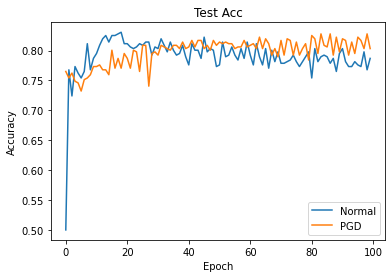

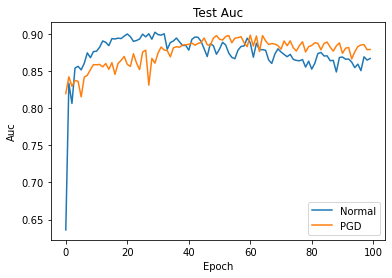

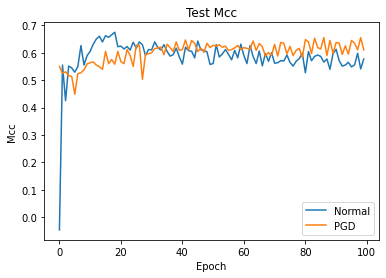

In [25]:
# charts drawn
l1,=plt.plot(history_orig.history['val_accuracy'],label='Normal')
l2,=plt.plot(history.history['val_accuracy'],label='PGD')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Acc')
plt.legend()
plt.savefig("pgd_model/test_acc.png")
plt.show()


l1,=plt.plot(history_orig.history['val_auc_1'],label='Normal')
l2,=plt.plot(history.history['val_auc'],label='PGD')
plt.title('Model auc')
plt.ylabel('Auc')
plt.xlabel('Epoch')
plt.title('Test Auc')
plt.legend()
plt.savefig("pgd_model/test_auc.png")
plt.show()

l1,=plt.plot(history_orig.history['val_mcc'],label='Normal')
l2,=plt.plot(history.history['val_mcc'],label='PGD')
plt.title('Model mcc')
plt.ylabel('Mcc')
plt.xlabel('Epoch')
plt.title('Test Mcc')
plt.legend()
plt.savefig("pgd_model/test_mcc.png")
plt.show()



# Data augmentation comparsion train

In [ ]:
# insert_model_train

cp = ModelCheckpoint('4mC_C.equisetifolia_insert_model',monitor='val_accuracy',verbose=1,save_best_only=True) 

history_insert=model_insert.fit(X_train_insert, y_train, validation_data=(X_test_insert, y_test),epochs=100, batch_size=64,callbacks=[cp])


In [ ]:
# exchange_model_train
cp = ModelCheckpoint('4mC_C.equisetifolia__exchange_model',monitor='val_accuracy',verbose=100,save_best_only=True) 

history_exchange=model_exchange.fit(X_train_exchange, y_train, validation_data=(X_test_exchange, y_test),epochs=100, batch_size=64,callbacks=[cp])


In [ ]:
# mask_model_train
cp = ModelCheckpoint('4mC_C.equisetifolia__mask_model',monitor='val_accuracy',verbose=1,save_best_only=True) 

history_mask=model_mask.fit(X_train_mask, y_train, validation_data=(X_test_mask, y_test),epochs=100, batch_size=64,callbacks=[cp])


In [ ]:
l1,=plt.plot(history_insert.history['val_accuracy'],label='Insert')
l2,=plt.plot(history_exchange.history['val_accuracy'],label='Exchange')
l3,=plt.plot(history_mask.history['val_accuracy'],label='Mask')
l4,=plt.plot(history.history['val_accuracy'],label='Normal')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Acc')
plt.legend()
plt.savefig("data_aug/test_acc.png")
plt.show()


l1,=plt.plot(history_insert.history['val_auc_1'],label='Insert')
l2,=plt.plot(history_exchange.history['val_auc_2'],label='Exchange')
l3,=plt.plot(history_mask.history['val_auc_3'],label='Mask')
l4,=plt.plot(history.history['val_auc'],label='Normal')
plt.title('Model auc')
plt.ylabel('Auc')
plt.xlabel('Epoch')
plt.title('Test Auc')
plt.legend()
plt.savefig("data_aug/test_auc.png")
plt.show()


l1,=plt.plot(history_insert.history['val_mcc'],label='Insert')
l2,=plt.plot(history_exchange.history['val_mcc'],label='Exchange')
l3,=plt.plot(history_mask.history['val_mcc'],label='Mask')
l4,=plt.plot(history.history['val_mcc'],label='Normal')
plt.title('Model mcc')
plt.ylabel('Mcc')
plt.xlabel('Epoch')
plt.title('Test Mcc')
plt.legend()
plt.savefig("data_aug/test_mcc.png")
plt.show()
